<a href="https://colab.research.google.com/github/guilhermelaviola/SoccerCompetitionsStudy/blob/main/UEFAEuroStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
import seaborn as sns

In [3]:
# Importing the dataset:
nt_tournaments = pd.ExcelFile('NT tournaments finals.xlsx')
ue = pd.read_excel(nt_tournaments, 'UEFA Euro finals')

# Displaying the last 5 champions:
ue.tail()

,Year,Winners,Score,Runners-up,Venue,Host city,Host country,Attendance,How the match was won,Unnamed: 9
12,2004,Greece,1–0,Portugal,Estádio da Luz,Lisbon,Portugal,62865,Regular time,NaN
13,2008,Spain,1–0,Germany,Ernst-Happel-Stadion,Vienna,Austria,51428,Regular time,NaN
14,2012,Spain,4–0,Italy,Olimpiyskiy National Sports Complex,Kyiv,Ukraine,63170,Regular time,NaN
15,2016,Portugal,1–0,France,Stade de France,Saint-Denis,France,75868,Extra time,NaN
16,2020,Italy,1–1,England,Wembley Stadium,London,England,67173,Extra time and Penalty shootout,


In [4]:
# Displaying the number of rows and columns in the dataset:
ue.shape

(17, 10)

In [5]:
# Displaying the datatypes presented in the columns:
ue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   17 non-null     int64 
 1   Winners                17 non-null     object
 2   Score                  17 non-null     object
 3   Runners-up             17 non-null     object
 4   Venue                  17 non-null     object
 5   Host city              17 non-null     object
 6   Host country           17 non-null     object
 7   Attendance             17 non-null     int64 
 8   How the match was won  17 non-null     object
 9   Unnamed: 9             1 non-null      object
dtypes: int64(2), object(8)
memory usage: 1.5+ KB


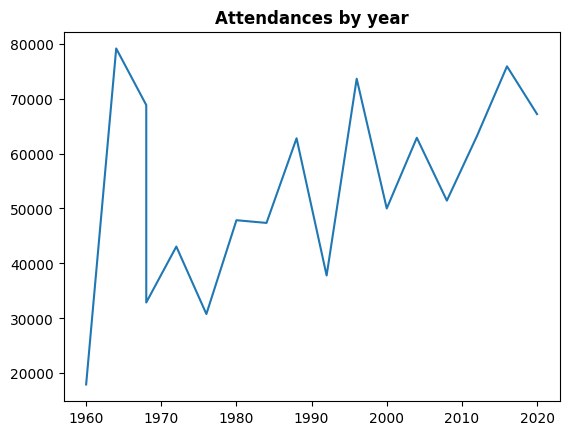

In [12]:
# Displaying the attendances by year:
plt.plot(ue['Year'], ue['Attendance'])
plt.title('Attendances by year', fontweight = 'bold')
plt.show()

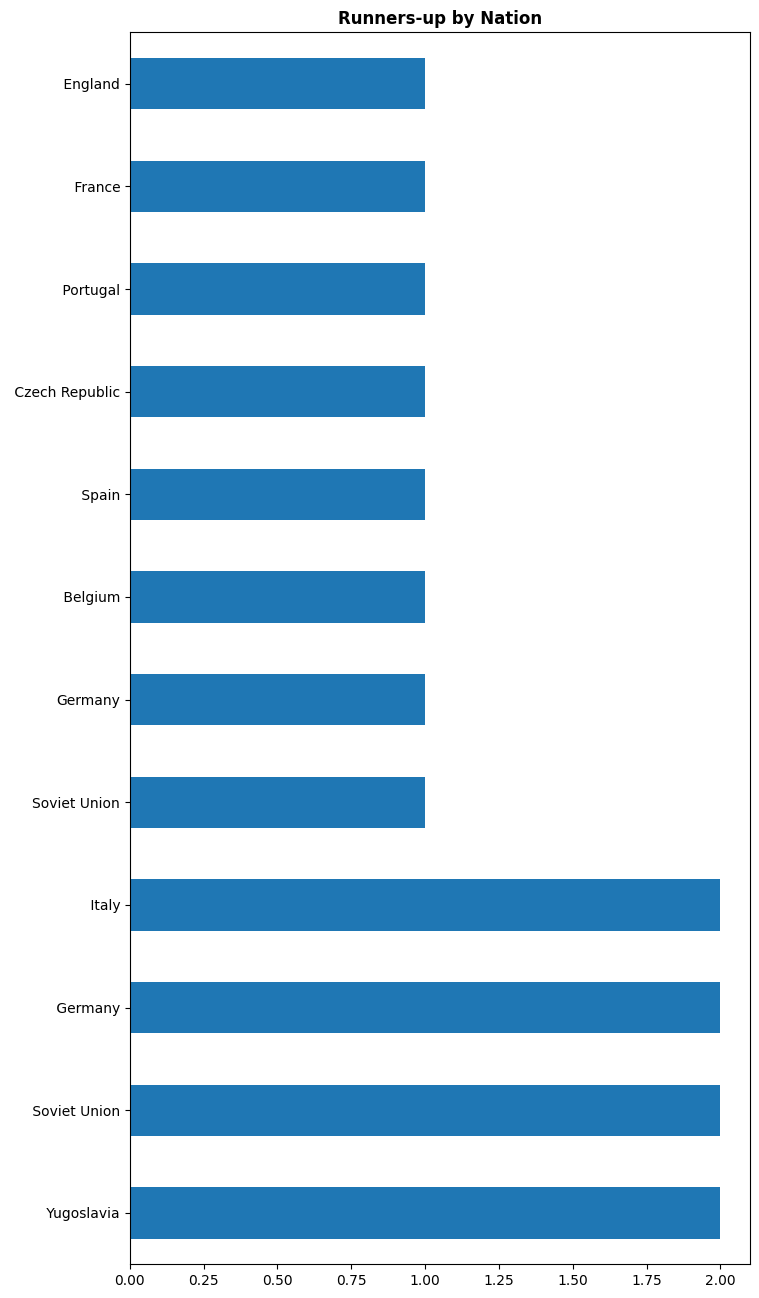

In [19]:
# Displaying runners-up by Nation:
ue.groupby('Year').first()['Runners-up'].value_counts().plot(kind = 'barh',
                                                                     figsize = (8, 16))
plt.ylabel(None)
plt.title('Runners-up by Nation', fontweight = 'bold')
plt.show()

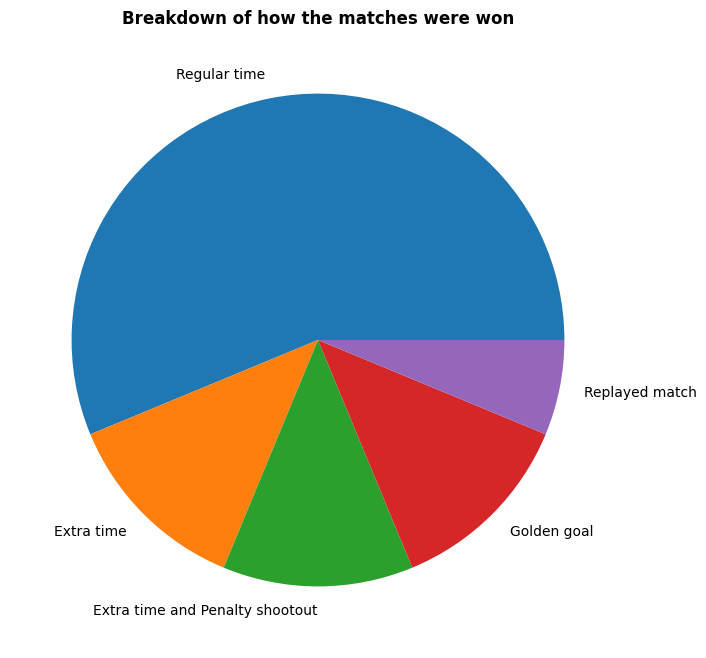

In [15]:
# Displaying the breakdown of how the matches were won:
ue.groupby('Year').first()['How the match was won'].value_counts().plot(kind = 'pie',
                                                                     figsize = (8, 8))
plt.ylabel(None)
plt.title('Breakdown of how the matches were won', fontweight = 'bold')
plt.show()